<a href="https://colab.research.google.com/github/Gracesugut/Machine-learning--practice-projects/blob/master/Classification_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RESEARCH QUESTION**

What are the main factors that cause a customer to Churn? Predicting whether an customer will churn

**METRICS FOR SUCCESS**



*  I will  examine the dataset to check whether it is imbalanced or balanced
*   Check for accuracy score (works for balanced dataset)
*  Check for high precision ,high recall and high F1 score (works for imbalanced dataset)



**CONTEXT OF THE RESEARCH PROBLEM**

The communications sector is emerging with new technologies , wireless and wireline services.Industry success expects a better perception of customer requirements and superior quality of service and models.Customer churn has a huge impact on companies and is the prime focus area for companies to remin competitive.Companies ought to anticipate how each customers will react to specific offers and predict which customers will be positively influences. It is very important for to retain their customers to maintain profitability.

**EXPERIMENTAL DESIGN**

The steps to acomplish the project include:


*   Importation of the data
*   Data preparation and cleaning. This involves:
       performing quality checks on the data
       removing any misssing values and duplicates
       identifying any outliers
       Identiying  any irregular data

*   Data analysis:
       conducting step by step analysis on each data
       Analysis of binary data
       Feature engineering and checking for multicolinearity
*   Data Modelling:
       This involves classification analysis to determine which model  will     perform best on the data






**DATA RELEVANCE**

The data provided is relevant to the research question as it provides insights to which group of customers are churning and how to predict it.

**[DATA CLEANING AND PREPARATION**

In [ ]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

In [ ]:
#importing the data
customers=pd.read_csv('https://bit.ly/MTNTelcoDataset' )
customers.sample(3)

,recordid,customer_id,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes_2,total_intl_calls_2,total_intl_charge,number_customer_service_calls,churn
10683,10684,26014670.0,176,415,False,8.7,4,False,0,169.5,151,28.82,112.9,84,9.60,56.6,99,2.55,8.7,4,2.35,0,False
7709,7710,11731494.0,193,415,False,11.7,3,True,31,71.2,58,12.10,124.7,105,10.60,155.5,108,7.00,11.7,3,3.16,0,False
12293,12294,24521650.0,87,510,False,7.4,2,False,0,256.2,105,43.55,160.7,102,13.66,249.4,80,11.22,7.4,2,2.00,4,False


In [ ]:
#checking the dataset shape
customers.shape

(12892, 23)

The dataset has 12892 records and 23 variables

In [ ]:
#Drop the 'recordid'and 'customer_id' columns in the dataset as we have no need for it
customers.drop(columns=['recordid','customer_id'],inplace=True)

In [ ]:
#preview variable datatypes
customers.dtypes

account_length                     int64
area_code                          int64
international_plan                  bool
total_intl_minutes               float64
total_intl_calls                   int64
voice_mail_plan                     bool
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes_2             float64
total_intl_calls_2                 int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
dtype: object

The datasets variables is majorly numerical with exception to 'international_plan','voice_mail_plan' and 'churn' which are boolean

In [ ]:
#check for duplicates
customers.duplicated().sum()

7892

There are 7892 duplicates found. We will drop them

In [ ]:
#dropping duplicates 
customers=customers.drop_duplicates()
customers.shape

(5000, 21)

In [ ]:
#check for missing values
customers.isna().sum()

account_length                   0
area_code                        0
international_plan               0
total_intl_minutes               0
total_intl_calls                 0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes_2             0
total_intl_calls_2               0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

No missing values found

In [ ]:
#checking for unique values in each variable
columns = customers.columns

for col in columns:
    print("Variable:", col)
    print("Number of unique values:", customers[col].nunique())
    print(customers[col].unique())
    print()

Variable: account_length
Number of unique values: 218
[101 137 103  99 108 117  63  94 138 128 113 140 102  60  96 178  75 106
 158 111  92  42  69  76  72 115  68  97  90  73  54 161 125 194 141  98
 110  70  66  79  61  77 105 159  83  93 163 169  57  85 132 190  39  84
  71 114 135  82  64 112 166 120 187 100  45  43  52  74  40  56 133 119
 131 118 107 109 127  33 145  47  53 148  55 143 170  65 157  89  91 104
 130  80 146  29  78 185 144  59 139  12 150 156  17 176  95 136 165 149
 124  87  51 126  62  48  58  81  36 177  25 171 122  44 167  41 184  88
 151 160 152  49  13 142   3  23  19 154 116 173  24  15  86 147  21 174
 162 186  14   7   1  18  20  11 192 121 134  67 164 180  35 155  32 123
 182 129  38  37  50  27 188 175   5  26   4  31 193 238  28 195 153 201
 216 183 168 222 232 233  22  46  34   8 217   2 200 172  16  30 202 181
  10   6 179 208 215 199 196 209 224 189 243 205   9 210 212 197 225 191
 204 221]

Variable: area_code
Number of unique values: 3
[510 408 415

 There appears to be duplicated columns between 'total_intl_minutes' and 'total_intl_minutes_2', and 'total_intl_calls' and 'total_intl_calls_2'. 

In [ ]:
#previewing the posibly duplicated columns
customers[['total_intl_minutes', 'total_intl_calls', 'total_intl_minutes_2', 'total_intl_calls_2']]

,total_intl_minutes,total_intl_calls,total_intl_minutes_2,total_intl_calls_2
0,10.6,3,10.6,3
1,9.5,7,9.5,7
2,13.7,6,13.7,6
3,15.7,2,15.7,2
4,7.7,4,7.7,4
...,...,...,...,...
4995,9.9,6,9.9,6
4996,9.6,4,9.6,4
4997,14.1,6,14.1,6
4998,5.0,10,5.0,10


The last 2 columns appears to be copies of the first 2 columns

In [ ]:
# selecting the total number of records where the values of 'total_intl_minutes' are equal to the values of 
# 'total_intl_minutes_2', AND the values of 'total_intl_calls' are equal to the values of 'total_intl_calls_2'
customers[(customers['total_intl_minutes'] == customers['total_intl_minutes_2']) & (customers['total_intl_calls'] == customers['total_intl_calls_2'])].count()

account_length                   5000
area_code                        5000
international_plan               5000
total_intl_minutes               5000
total_intl_calls                 5000
voice_mail_plan                  5000
number_vmail_messages            5000
total_day_minutes                5000
total_day_calls                  5000
total_day_charge                 5000
total_eve_minutes                5000
total_eve_calls                  5000
total_eve_charge                 5000
total_night_minutes              5000
total_night_calls                5000
total_night_charge               5000
total_intl_minutes_2             5000
total_intl_calls_2               5000
total_intl_charge                5000
number_customer_service_calls    5000
churn                            5000
dtype: int64

We can confirm that the columns are duplicates and replicate them

In [ ]:
customers=customers.drop(columns=['total_intl_minutes_2','total_intl_calls_2'])
customers.shape

(5000, 19)

Another anomaly noted is that where there are records of 'total_intl_minutes', 'total_int_calls', and 'total_intl_charge' when 'international_plan' is False.

In [ ]:
customers[(customers['international_plan'] == False) & ((customers['total_intl_minutes'] > 0) | (customers['total_intl_calls'] > 0) | customers['total_intl_charge'] > 0)]

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,False,10.6,3,False,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,False
1,137,510,False,9.5,7,False,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,False
2,103,408,False,13.7,6,True,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,False
3,99,415,False,15.7,2,False,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,False
4,108,415,False,7.7,4,False,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,79,415,False,11.8,5,False,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,3.19,2,False
4995,192,415,False,9.9,6,True,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,2.67,2,False
4996,68,415,False,9.6,4,False,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,2.59,3,False
4997,28,510,False,14.1,6,False,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,3.81,2,False


In [ ]:
customers.international_plan.value_counts()

False    4527
True      473
Name: international_plan, dtype: int64

There are 4527 false values for international_plan and 473 true values

Removing these invalid variables would result in a huge loss of data. We will therefore leave them as is, but flag them for future work.

In [ ]:
#checking to see that there are no 'number_vmail_messages' when 'voice_mail_plan' is set to False.
customers[(customers['voice_mail_plan'] == False) & (customers['number_vmail_messages'] > 0)]

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn


There are no  number vmail messages when voicemail plan is false

In [ ]:
#dropping the voice mail plan column
customers.drop(columns=['voice_mail_plan'],inplace=True)

In [ ]:
customers.dtypes

account_length                     int64
area_code                          int64
international_plan                  bool
total_intl_minutes               float64
total_intl_calls                   int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
dtype: object

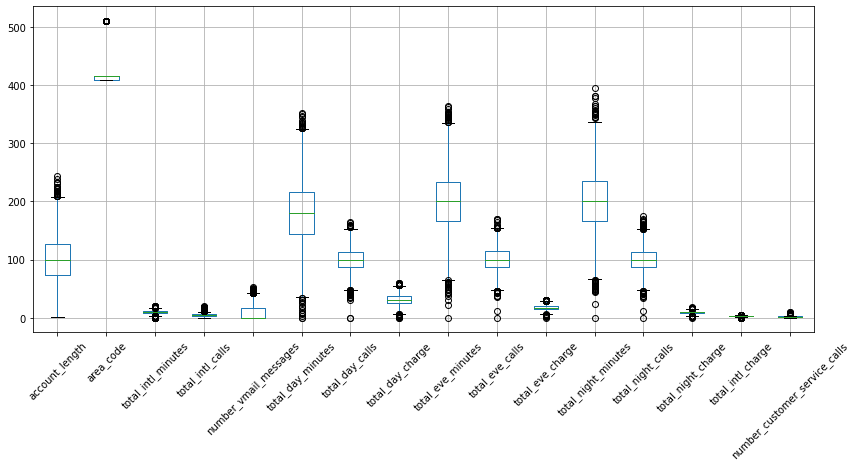

In [ ]:
# looking for outliers
num_cols = customers.columns.to_list()
num_cols.remove('international_plan')
num_cols.remove('churn')

plt.figure(figsize = (14, 6))
customers.boxplot(num_cols)
plt.xticks(rotation = 45)
plt.show()

All remaining variables have outliers which we will not drop

In [ ]:
#saving our clean dataset to a new clean csv file
customers.to_csv('call_center_clean.csv',index=False)
n_customers=pd.read_csv('call_center_clean.csv')
n_customers.head()

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,False,10.6,3,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,False
1,137,510,False,9.5,7,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,False
2,103,408,False,13.7,6,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,False
3,99,415,False,15.7,2,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,False
4,108,415,False,7.7,4,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,False


**DATA ANALYSIS**

**UNIVARIATE ANALYSIS**

In [ ]:
#get the summary statistics
n_customers.describe()

,account_length,area_code,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,10.261780,4.435200,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,2.771196,1.570400
std,39.69456,42.209182,2.761396,2.456788,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,8.500000,3.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,2.300000,1.000000
50%,100.00000,415.000000,10.300000,4.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,2.780000,1.000000
75%,127.00000,415.000000,12.000000,6.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,3.240000,2.000000
max,243.00000,510.000000,20.000000,20.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,5.400000,9.000000


415    2495
408    1259
510    1246
Name: area_code, dtype: int64


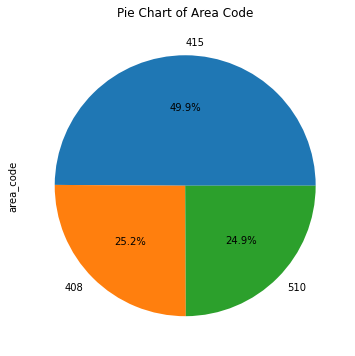

In [ ]:
print(n_customers.area_code.value_counts())

plt.figure(figsize = (6, 6))
customers.area_code.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Pie Chart of Area Code')
plt.show()

Area Code 415 consists of almost half of the area codes in this dataset. Area Code 510 very slightly outnumbers Area Code 408.

False    4527
True      473
Name: international_plan, dtype: int64


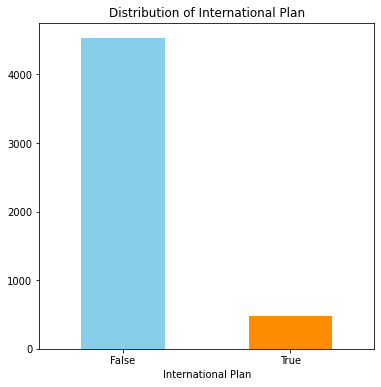

In [ ]:
print(n_customers.international_plan.value_counts())

plt.figure(figsize = (6, 6))
n_customers.international_plan.value_counts().plot(kind = 'bar', rot = 0, color = ['skyblue', 'darkorange'])
plt.title('Distribution of International Plan')
plt.xlabel('International Plan')
plt.show()

Very few customers are subscribed to international dataplan

1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: number_customer_service_calls, dtype: int64


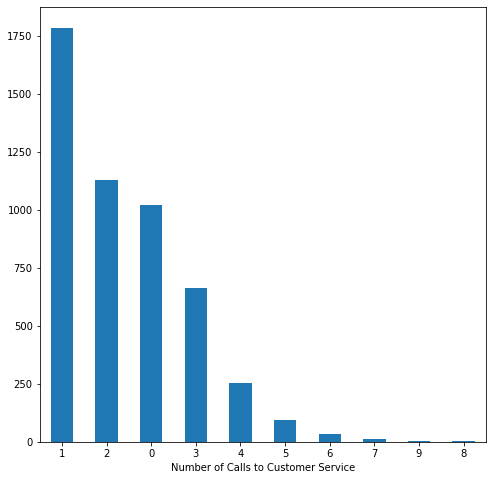

In [ ]:
print(n_customers.number_customer_service_calls.value_counts())

plt.figure(figsize = (8, 8))
n_customers.number_customer_service_calls.value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel("Number of Calls to Customer Service")
plt.show()

Most customers made exactly 1 call to customer service followed by those who made 2 calls, and then those who made 0 calls. Those who made more than 5 calls make up the minority.

False    4293
True      707
Name: churn, dtype: int64


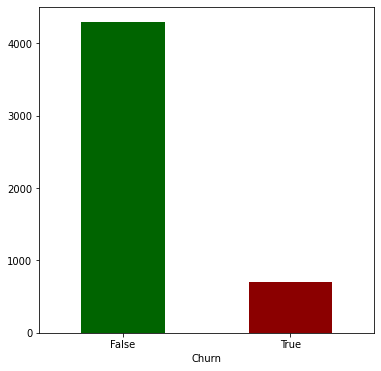

In [ ]:
print(n_customers.churn.value_counts())

plt.figure(figsize = (6, 6))
n_customers.churn.value_counts().plot(kind ='bar', rot = 0, color = ['darkgreen', 'darkred'])
plt.xlabel("Churn")
plt.show()

Majority of the customers in this dataset have not churned, thereby making this dataset very biased.

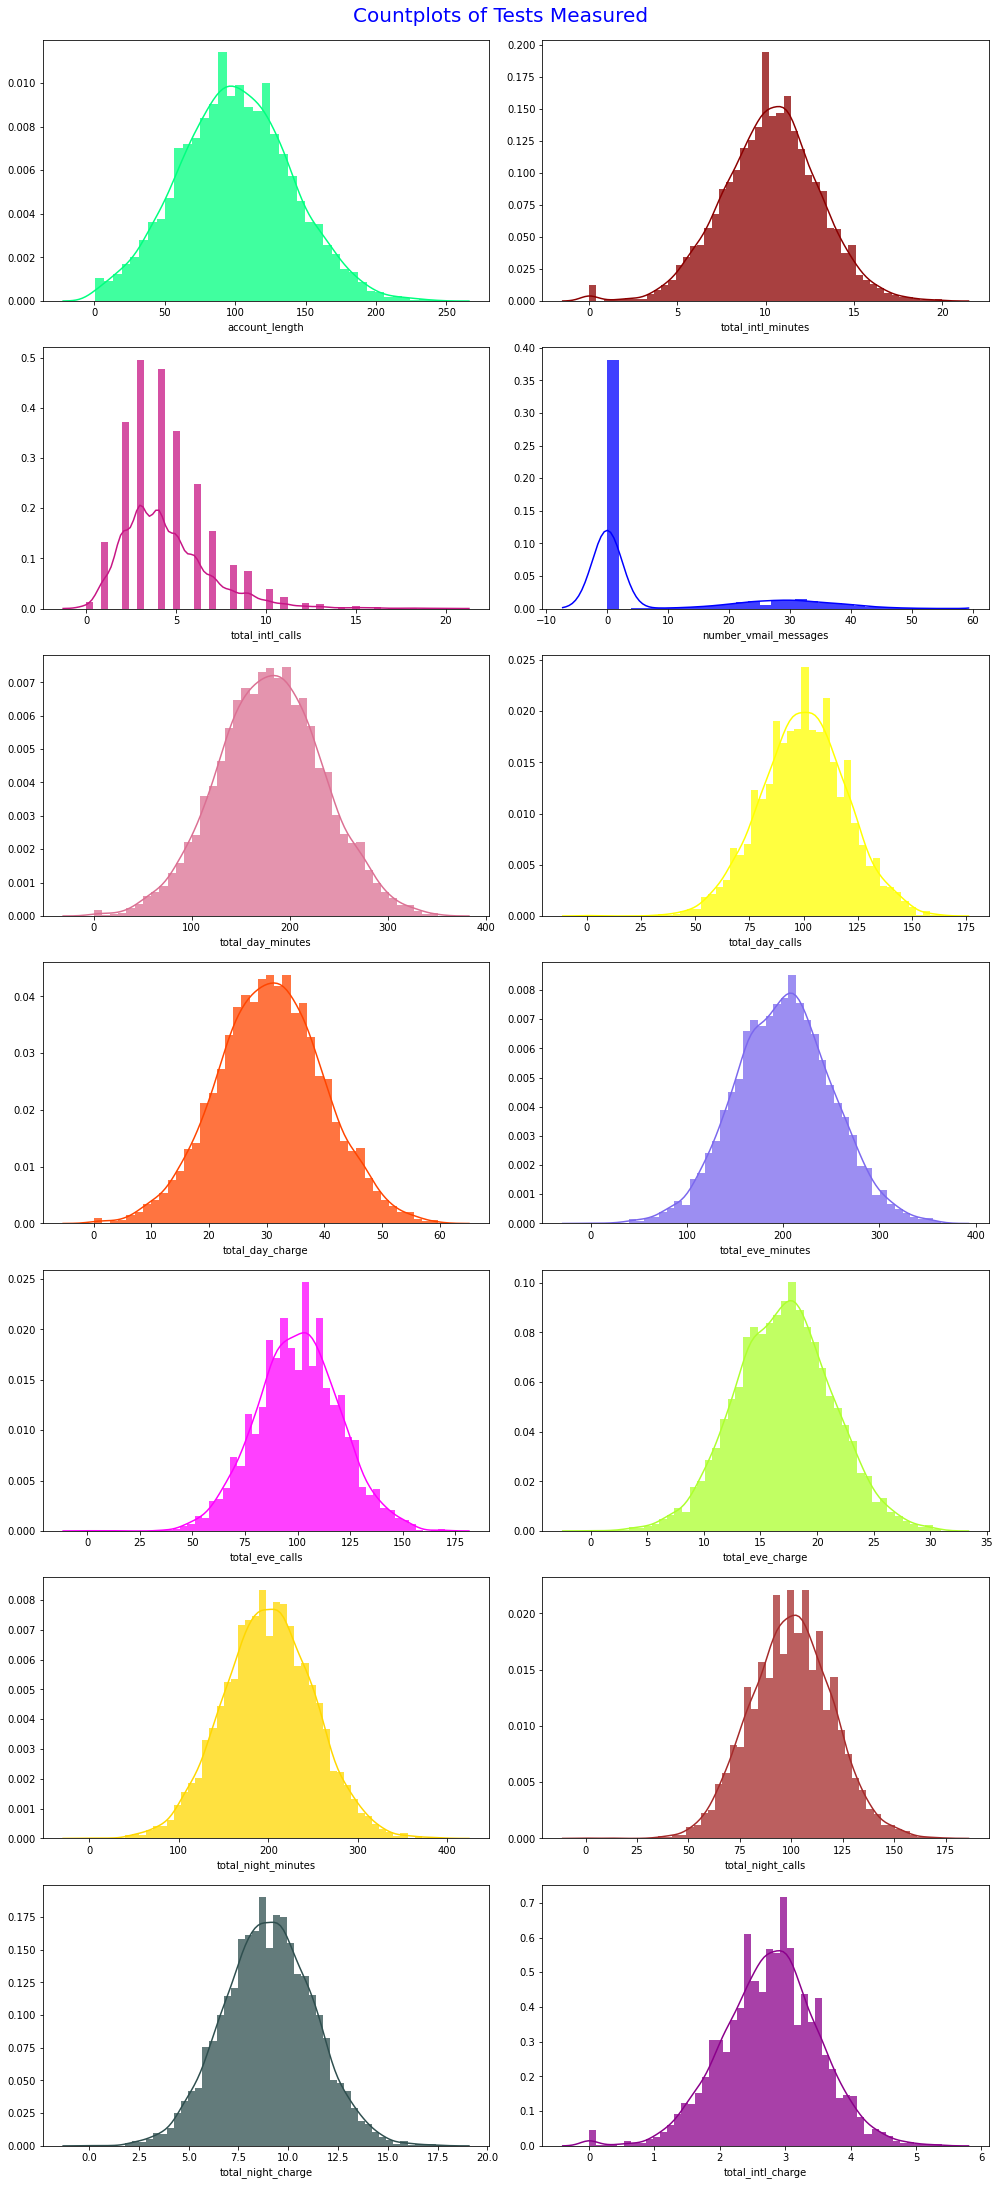

In [ ]:
# plotting the histograms of all our numerical variables with the
# exception of 'area_code' and 'number_customer_service_calls'
num_cols.remove('area_code')
num_cols.remove('number_customer_service_calls')

fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (14, 30))
plt.suptitle('Countplots of Tests Measured', fontsize = 20, y = 1.01, color = 'blue')

colors = ['#00FF7F', '#8B0000', '#C71585', '#0000FF', '#DB7093', '#FFFF00', '#FF4500',
          '#7B68EE', '#FF00FF', '#ADFF2F', '#FFD700', '#A52A2A', '#2F4F4F', '#8B008B']
for ax, column, color in zip(axes.flatten(), num_cols, colors):
    sns.distplot(n_customers[column], ax = ax, color = color, hist_kws = dict(alpha = 0.75))
    
plt.tight_layout()

Majority of the numerical variables have normal distributions. Apart from having most of its values in the 0-5 bin, the 'number_vmail_messages' variable appears to be normally distributed. The 'total_intl_calls' variable is skewed to the right and is not continuous.

**BIVARIATE ANALYSIS**

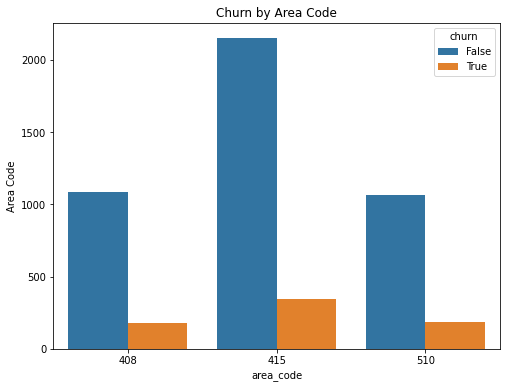

In [ ]:
# churn by area code
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('area_code', hue = 'churn', data = n_customers)
churn_area_code.set(title = "Churn by Area Code", ylabel = 'Area Code')
plt.show()

Area code 415 had the highest churn rates

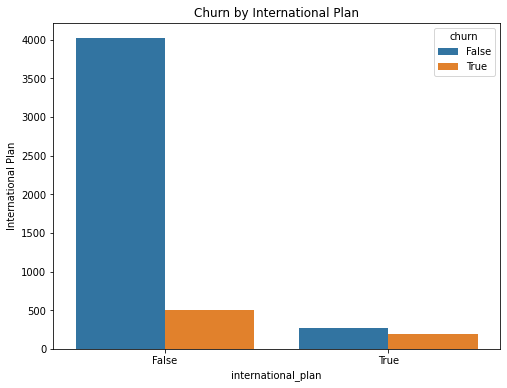

In [ ]:
# churn by international plan
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('international_plan', hue = 'churn', data = n_customers)
churn_area_code.set(title = "Churn by International Plan", ylabel = 'International Plan')
plt.show()

Those without international plans churned more than those with international plans.

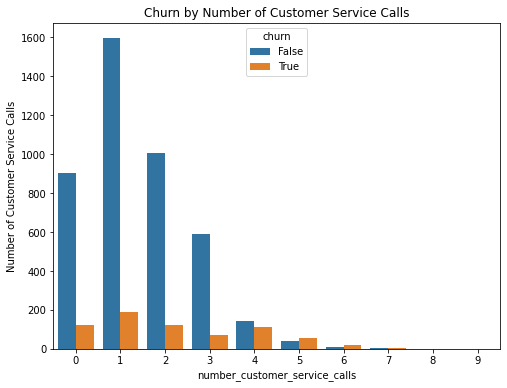

In [ ]:
# churn by number of customer service calls
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('number_customer_service_calls', hue = 'churn', data = n_customers)
churn_area_code.set(title = "Churn by Number of Customer Service Calls",
                    ylabel = 'Number of Customer Service Calls')
plt.show()

The interesting thing to note here is that those who made 0 or 2 calls to customer service churned at around the same rate. Similarly, those who made more than 3 calls reported high churn rates.

**FEATURE ENGINEERING AND TEST FOR MULTICOLINEARITY**

In [ ]:
#Converting values for international value plans to binary
n_customers['international_plan'] = n_customers['international_plan'].replace({False : 0, True : 1})
n_customers['churn'] = n_customers['churn'].replace({False : 0, True : 1})
n_customers.head()

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,0,10.6,3,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,0
1,137,510,0,9.5,7,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,0
2,103,408,0,13.7,6,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,0
3,99,415,0,15.7,2,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,0
4,108,415,0,7.7,4,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,0


In [ ]:
# checking the correlations between the numerical variables
correlations=n_customers.corr(method='pearson')
correlations

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,-0.018054,0.014681,0.001291,0.014277,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.000656,0.001292,-0.001445,0.021203
area_code,-0.018054,1.000000,0.032107,-0.004154,-0.013623,-0.003399,-0.019118,-0.019314,-0.019119,0.007098,-0.012300,0.007114,0.002084,0.014657,0.002070,-0.004219,0.020921,0.010195
international_plan,0.014681,0.032107,1.000000,0.031799,0.004493,0.011947,0.028138,0.008102,0.028141,0.021235,0.002505,0.021234,-0.026508,0.005623,-0.026510,0.031751,-0.012974,0.259123
total_intl_minutes,0.001291,-0.004154,0.031799,1.000000,0.016791,0.002463,-0.019486,0.013097,-0.019490,0.000137,-0.007458,0.000132,-0.006721,0.000391,-0.006717,0.999993,-0.012122,0.063285
total_intl_calls,0.014277,-0.013623,0.004493,0.016791,1.000000,0.000124,-0.001303,0.010893,-0.001307,0.008388,0.005574,0.008393,-0.017214,-0.000156,-0.017182,0.016900,-0.019147,-0.046893
number_vmail_messages,-0.014575,-0.003399,0.011947,0.002463,0.000124,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002505,-0.007086,-0.097633
total_day_minutes,-0.001017,-0.019118,0.028138,-0.019486,-0.001303,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019415,0.002733,0.207705
total_day_calls,0.028240,-0.019314,0.008102,0.013097,0.010893,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.002802,0.013161,-0.010739,0.016130
total_day_charge,-0.001019,-0.019119,0.028141,-0.019490,-0.001307,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019419,0.002726,0.207700
total_eve_minutes,-0.009591,0.007098,0.021235,0.000137,0.008388,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000159,-0.013823,0.089288


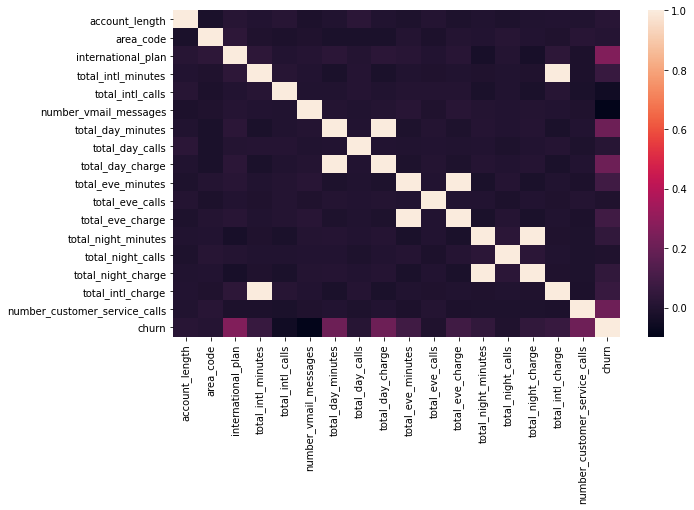

In [ ]:
# plotting the correlations onto a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlations)

We see some perfect correlations between the following variables:

'total_day_minutes' and 'total_day_charge'

'total_eve_minutes' and 'total_eve_charge'

'total_night_minutes' and 'total_night_charge'

'total_intl_minutes' and 'total_intl_charge'

We will drop the minutes.

In [ ]:
# drop the columns with minutes, e.g., 'total_day_minutes', etc.
n_customers= n_customers.drop(columns = ['total_day_minutes', 'total_eve_minutes','total_night_minutes','total_intl_minutes'])


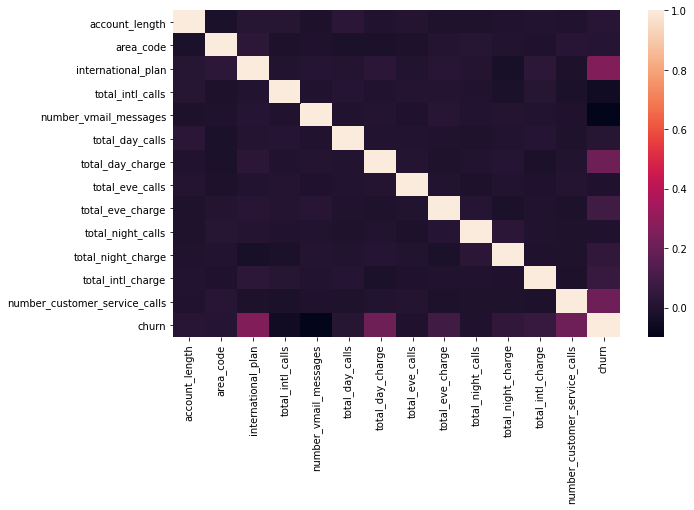

In [ ]:
# checking the correlations between the numerical variables
n_correlations=n_customers.corr(method='pearson')
# plotting the correlations onto a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(n_correlations)

We will then check the Variance Inflation Factor (VIF) scores to ensure there is no high multicollinearity.

In [ ]:
# calculate VIF and plot the heatmap
w=n_customers.assign(const=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(w.values, i) for i in range(w.shape[1])]
vif['variable'] = w.columns
vif

,VIF,variable
0,1.002339,account_length
1,1.003202,area_code
2,1.084081,international_plan
3,1.003978,total_intl_calls
4,1.013652,number_vmail_messages
5,1.001953,total_day_calls
6,1.051936,total_day_charge
7,1.000780,total_eve_calls
8,1.012273,total_eve_charge
9,1.001672,total_night_calls


We don't see any VIF score of 5 and above, which means our dataset does not have high levels of multicollinearity. 

**DATA MODELLING**

We will carry out 5 types of classification analysis, namely:

Logistic Regression

Gaussian Naive Bayes (NB) classification

Decision Trees Classification

K-Nearest Neighbors (KNN) Classification

Support Vector Machine (SVM) Classification

We will then compare the different classification models to assess the best performing one(s).

In [ ]:
# dividing our dataset into features (X) and target (y)
X = n_customers.iloc[:, 0:12].values  
y = n_customers.iloc[:, 13].values     

In [ ]:
# splitting into 80-20 train-test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size = 0.2, random_state = 0)

In [ ]:
# performing feature scaling on our training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fitting and transforming X_train while transforming X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# loading our classification libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier     
from sklearn.svm import SVC                         
from sklearn.naive_bayes import GaussianNB          
from sklearn.neighbors import KNeighborsClassifier

# instantiating our classifiers
logistic_classifier = LogisticRegression(random_state = 0, solver='lbfgs')
decision_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
naive_classifier = GaussianNB()

# fitting our classifiers to the training data
logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
naive_classifier.fit(X_train, y_train)

# making predictions
logistic_y_prediction = logistic_classifier.predict(X_test) 
decision_y_prediction = decision_classifier.predict(X_test) 
svm_y_prediction = svm_classifier.predict(X_test) 
knn_y_prediction = knn_classifier.predict(X_test) 
naive_y_prediction = naive_classifier.predict(X_test)

In [ ]:
# printing the classification report for each classifier to assess performance
from sklearn.metrics import classification_report

# classification report for Logistic Regression
print("Logistic Regression classification report:")
print(classification_report(logistic_y_prediction, y_test))

# classification report for Gaussian Naive Bayes Classifier
print("Gaussian Naive Bayes classification report:")
print(classification_report(naive_y_prediction, y_test))

# classification report for Decision Tree Classifier
print("Decision Tree classification report:")
print(classification_report(decision_y_prediction, y_test))

# classification report for K-Nearest Neighbors Classifier
print("K-Nearest Neighbors classification report:")
print(classification_report(knn_y_prediction, y_test))

# classification report for Support Vector Machine Classifier
print("Support Vector Machine classification report:")
print(classification_report(svm_y_prediction, y_test))

Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       970
           1       0.13      0.63      0.21        30

    accuracy                           0.86      1000
   macro avg       0.56      0.75      0.57      1000
weighted avg       0.96      0.86      0.90      1000

Gaussian Naive Bayes classification report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       907
           1       0.29      0.47      0.36        93

    accuracy                           0.84      1000
   macro avg       0.62      0.68      0.64      1000
weighted avg       0.88      0.84      0.86      1000

Decision Tree classification report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       838
           1       0.55      0.51      0.53       162

    accuracy                           0.85      1000
   m

The support shows the dataset is highly imbalanced  

For logistic regression the is precision: 0.96 , the recall: 0.86  and f1_score: 0.90

For Naive Bayes the is precision: 0.88 , the recall: 0.84  and f1_score: 0.86 

For Decision Tree classification the is precision: 0.85, the recall:  0.85  and f1_score: 0.85

For K-Nearest Neighbors  the is precision: 0.95,the recall: 0.87   and f1_score: 0.90

For Support Vector Machine classification the is precision: 0.95,  the recall: 0.89  and f1_score: 0.91

**SUMMARY OF FINDINGS**



*   Area Code 415 consists of almost half of the area codes in this dataset. Area Code 510 very slightly outnumbers Area Code 408.
*   Very few of the customers are subscribed to an international plan.
*   Majority of the customers in this dataset have not churned, thereby making this dataset very biased.
*   Majority of the numerical variables have normal distributions. Apart from having most of its values in the 0-5 bin, the 'number_vmail_messages' variable appears to be normally distributed. The 'total_intl_calls' variable is skewed to the right and is not continuous.
*   Area code 415 reports the highest churn rates.
*   Those without international plans churned more than those with international plans.
*   The interesting thing to note here is that those who made 0 or 2 calls to customer service churned at around the same rate. Similarly, those who made more than 3 calls reported high churn rates.
*   The support shows the dataset is highly imbalanced
*   For logistic regression the is precision: 0.96 , the recall: 0.86 and f1_score:0.90

*   For Naive Bayes the is precision: 0.88 , the recall: 0.84 and f1_score: 0.86

*   For Decision Tree classification the is precision: 0.85, the recall: 0.85 and f1_score: 0.85
*   For K-Nearest Neighbors the is precision: 0.95,the recall: 0.87 and f1_score: 0.90


*   For Support Vector Machine classification the is precision: 0.95, the recall: 0.89 and f1_score: 0.91



**RECCOMENDATION**


*   The company should consider marketing more in area 415 as it records the highest number of churns

*   Customer service is seemingly not the main reason for customer churns. I reccomend a further analysis to determine what causes churnung among customers

*   The company should consider improvement for the local plans as those without international plans recorded high churns


*   The most accurate model was support vector machine which recorded an f1_score of 0.91


**SOLUTION IMPROVEMENT**

I suggest using ROC curve and Area under ROC curve to determine the best model as the data is highly imbalanced